In [42]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# API url
base_url = "https://api.apilayer.com/therundown/sports/5" #id 5 is for NCAA men's basketball
endpoint = "/teams" # I'm separating this in case I want to look at something else later
url = base_url+endpoint

# Pull in my api key without disclosing it
with open('rundown_api.txt', 'r') as file: 
    rundown_key = file.read()

headers= {
  "apikey": rundown_key
}

# Call api and ensure connection
r = requests.request("GET", url, headers=headers)
r.status_code # code of 200 means it successfully connected

200

In [3]:
# Make a DataFrame of all NCAA men's basketball teams
teams = pd.DataFrame(r.json()['teams'])

# The name of the conference is embedded in a conference variable, so this code pulls it out
teams['conference_name'] = teams['conference'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

# split record into wins and losses and make them numeric so we can run analyses on data
teams['wins'] = teams['record'].apply(lambda x: int(x.split('-')[0]) if isinstance(x, str) else None)
teams['losses'] = teams['record'].apply(lambda x: int(x.split('-')[1]) if isinstance(x, str) else None)

# Limit DataFrame to just variables I'm interested in
teams = teams[['name', 'abbreviation', 'mascot', 'wins', 'losses', 'conference_name']]

# Get rid of teams that aren't part of any conference
for index, team in teams.iterrows():
    if (team['conference_name']) == None:
        teams = teams.drop(index)

teams.reset_index(drop=True, inplace=True)
teams # print dataframe


,name,abbreviation,mascot,wins,losses,conference_name
0,Abilene Christian,ACU,Wildcats,16.0,18.0,Western Athletic Conference
1,Air Force,AF,Falcons,9.0,22.0,Mountain West Conference
2,Akron,AKRN,Zips,24.0,11.0,Mid-American Conference
3,Alabama,BAMA,Crimson Tide,25.0,12.0,Southeastern Conference
4,Alabama A&M,AAMU,Bulldogs,12.0,23.0,Southwestern Athletic Conference
...,...,...,...,...,...,...
358,Wright State,WRST,Raiders,18.0,14.0,Horizon League
359,Wyoming,WYO,Cowboys,15.0,17.0,Mountain West Conference
360,Xavier,XAV,Muskateers,16.0,18.0,Big East Conference
361,Yale,YALE,Bulldogs,23.0,10.0,Ivy League


In [45]:
# Make a csv file of the data
teams.to_csv('NCAAbasketball.csv', index = True)

In [ ]:
# The info on TheRundown has changed since I collected it, so I'll call it from here to manipulate my original dataframe.
teams = pd.read_csv('NCAAbasketball.csv')

In [16]:
best_teams = teams.sort_values(by ='wins', ascending=False,).head(10)
best_teams

,Unnamed: 0,name,abbreviation,mascot,wins,losses,conference_name
313,313,UConn,CONN,Huskies,37.0,3.0,Big East Conference
236,236,Purdue,PURD,Boilermakers,34.0,5.0,Big Ten Conference
122,122,Indiana State,INST,Sycamores,32.0,7.0,Missouri Valley Conference
113,113,Houston,HOU,Cougars,32.0,5.0,Big 12 Conference
131,131,James Madison,JMU,Dukes,32.0,4.0,Sun Belt Conference
104,104,Grand Canyon,GCU,Lopes,30.0,5.0,Western Athletic Conference
161,161,McNeese State,MCNS,Cowboys,30.0,4.0,Southland Conference
199,199,North Carolina,NC,Tar Heels,29.0,8.0,Atlantic Coast Conference
249,249,Samford,SAM,Bulldogs,29.0,6.0,Southern Conference
118,118,Illinois,ILL,Fighting Illini,29.0,9.0,Big Ten Conference


In [13]:
worst_teams = teams.sort_values(by = 'losses', ascending=False).head(10)
worst_teams

,Unnamed: 0,name,abbreviation,mascot,wins,losses,conference_name
70,70,Detroit Mercy,DET,Titans,1.0,31.0,Horizon League
175,175,Mississippi Valley State,MVSU,Delta Devils,1.0,30.0,Southwestern Athletic Conference
69,69,DePaul,DEP,Blue Demons,3.0,29.0,Big East Conference
260,260,Siena,SIENA,Saints,4.0,28.0,Metro Atlantic Athletic Conference
341,341,VMI,VMI,Keydets,4.0,28.0,Southern Conference
36,36,Cal Poly,CP,Mustangs,4.0,28.0,Big West Conference
32,32,Buffalo,BUF,Bulls,4.0,27.0,Mid-American Conference
57,57,Coppin State,COPP,Eagles,2.0,27.0,Mid-Eastern Athletic Conference
284,284,Stonehill,STNH,Skyhawks,4.0,27.0,Northeast Conference
127,127,IUPUI,IUPUI,Jaguars,6.0,26.0,Horizon League


In [34]:
conferences = teams.groupby('conference_name')['wins'].mean().sort_values(ascending=False)
conferences

conference_name
Big 12 Conference                     21.437500
Southeastern Conference               20.312500
Mountain West Conference              19.909091
Big East Conference                   19.909091
Big Ten Conference                    19.777778
Atlantic Coast Conference             19.166667
Atlantic 10 Conference                19.066667
Western Athletic Conference           18.555556
Missouri Valley Conference            18.416667
American Athletic Conference          17.769231
West Coast Conference                 17.727273
Southern Conference                   17.700000
Ohio Valley Conference                17.444444
Big South Conference                  17.111111
Big West Conference                   17.090909
Conference USA                        16.800000
Big Sky Conference                    16.700000
Horizon League                        16.454545
Coastal Athletic Association          16.428571
Sun Belt Conference                   16.428571
Summit League           

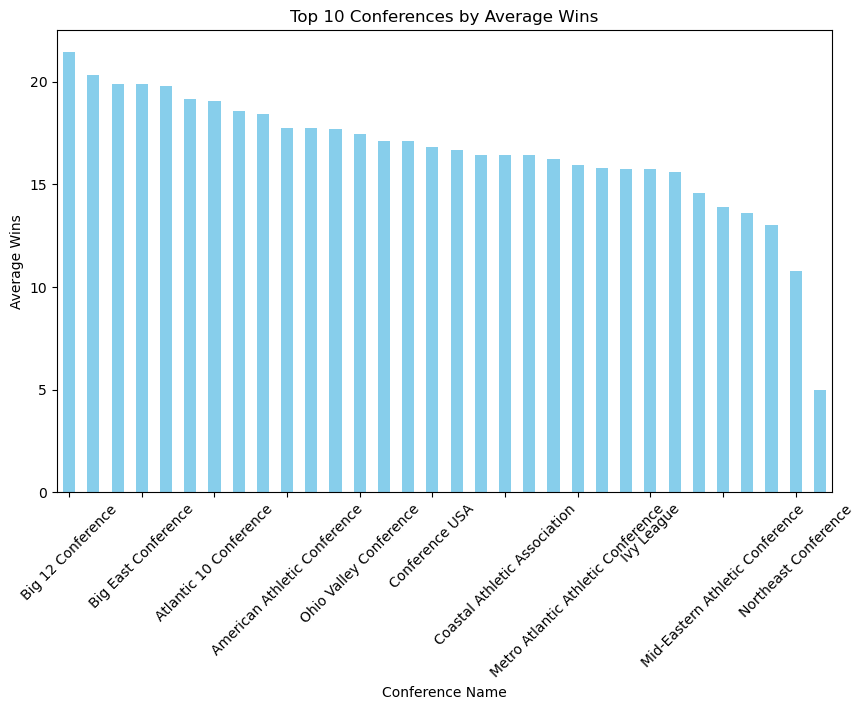

In [ ]:
plt.figure(figsize=(10, 6))
conferences.plot(kind='bar', color='skyblue')
plt.xlabel('Conference Name')
plt.ylabel('Average Wins')
plt.title('Conferences by Average Wins')
plt.xticks(range(0, len(conferences), 3), conferences.index[::3], rotation=45)
plt.show()